**Step 1 Data Explorationand Loading**


In [4]:
#importing dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/Walmart.csv", encoding_errors="ignore")
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [6]:
df.shape

(10051, 11)

In [7]:
df.describe

<bound method NDFrame.describe of        invoice_id   Branch         City                category unit_price  \
0               1  WALM003  San Antonio       Health and beauty     $74.69   
1               2  WALM048    Harlingen  Electronic accessories     $15.28   
2               3  WALM067  Haltom City      Home and lifestyle     $46.33   
3               4  WALM064      Bedford       Health and beauty     $58.22   
4               5  WALM013       Irving       Sports and travel     $86.31   
...           ...      ...          ...                     ...        ...   
10046        9996  WALM056      Rowlett     Fashion accessories        $37   
10047        9997  WALM030   Richardson      Home and lifestyle        $58   
10048        9998  WALM050     Victoria     Fashion accessories        $52   
10049        9999  WALM032        Tyler      Home and lifestyle        $79   
10050       10000  WALM069     Rockwall     Fashion accessories        $62   

       quantity      date      time payment_method  rating  profit_margin  
0           7.0  05/01/19  13:08:00        Ewallet     9.1           0.48  
1           5.0  08/03/19  10:29:00           Cash     9.6           0.48  
2           7.0  03/03/19  13:23:00    Credit card     7.4           0.33  
3           8.0  27/01/19  20:33:00        Ewallet     8.4           0.33  
4           7.0  08/02/19  10:37:00        Ewallet     5.3           0.48  
...         ...       ...       ...            ...     ...            ...  
10046       3.0  03/08/23  10:10:00           Cash     3.0           0.33  
10047       2.0  22/02/21  14:20:00           Cash     7.0           0.48  
10048       3.0  15/06/23  16:00:00    Credit card     4.0           0.48  
10049       2.0  25/02/21  12:25:00           Cash     7.0           0.48  
10050       3.0  26/09/20   9:48:00           Cash     3.0           0.33  

[10051 rows x 11 columns]>

In [8]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [9]:
#all duplicates
df.duplicated().sum()

np.int64(51)

In [10]:
#Handling duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.shape

(10000, 11)

In [11]:
#Handling null values
df.isnull().sum()

,0
invoice_id,0
Branch,0
City,0
category,0
unit_price,31
quantity,31
date,0
time,0
payment_method,0
rating,0


In [12]:
#Dropping all rows will null values
df.dropna(inplace=True)
df.isnull().sum()

,0
invoice_id,0
Branch,0
City,0
category,0
unit_price,0
quantity,0
date,0
time,0
payment_method,0
rating,0


In [13]:
df.shape
df.dtypes

,0
invoice_id,int64
Branch,object
City,object
category,object
unit_price,object
quantity,float64
date,object
time,object
payment_method,object
rating,float64


In [14]:
#converting unit_price column from object to float
df["unit_price"] = df["unit_price"].astype(str)

df["unit_price"] = df["unit_price"].str.replace("$", "", regex=False).astype(float)

df["unit_price"].head()


,unit_price
0,74.69
1,15.28
2,46.33
3,58.22
4,86.31


In [15]:
#creating a new column as 'Total column'
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

In [16]:
df["Total_amount"]=df["unit_price"]*df["quantity"]
df.tail()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Total_amount
9995,9996,WALM056,Rowlett,Fashion accessories,37.0,3.0,03/08/23,10:10:00,Cash,3.0,0.33,111.0
9996,9997,WALM030,Richardson,Home and lifestyle,58.0,2.0,22/02/21,14:20:00,Cash,7.0,0.48,116.0
9997,9998,WALM050,Victoria,Fashion accessories,52.0,3.0,15/06/23,16:00:00,Credit card,4.0,0.48,156.0
9998,9999,WALM032,Tyler,Home and lifestyle,79.0,2.0,25/02/21,12:25:00,Cash,7.0,0.48,158.0
9999,10000,WALM069,Rockwall,Fashion accessories,62.0,3.0,26/09/20,9:48:00,Cash,3.0,0.33,186.0


In [17]:
# Total number of records in the Walmart dataset
total_records = df.shape
print(f"Total Records in the dataset: {total_records}")


Total Records in the dataset: (9969, 12)


**1. Revenue Trends Across Branches and Categories**

In [18]:
# Revenue by Branch
branch_revenue = df.groupby("Branch")["Total_amount"].sum().sort_values(ascending=False)
print(branch_revenue)

Branch
WALM009    25688.34
WALM074    25555.42
WALM003    24950.56
WALM058    24524.37
WALM030    24460.60
             ...   
WALM039     6769.33
WALM033     6572.91
WALM013     6237.11
WALM031     5568.84
WALM092     5038.90
Name: Total_amount, Length: 100, dtype: float64


In [19]:
# Revenue by category
category_revenue = df.groupby("category")["Total_amount"].sum().sort_values(ascending=False)
print(category_revenue)


category
Fashion accessories       489480.90
Home and lifestyle        489250.06
Electronic accessories     78175.03
Food and beverages         53471.28
Sports and travel          52497.93
Health and beauty          46851.18
Name: Total_amount, dtype: float64


In [20]:
# Revenue by City
city_revenue = df.groupby("City")["Total_amount"].sum().sort_values(ascending=False)

print(city_revenue)

City
Weslaco         46351.79
Waxahachie      40703.33
Plano           25688.34
San Antonio     24950.56
Port Arthur     24524.37
                  ...   
Longview         6769.33
Pearland         6572.91
Irving           6237.11
Lewisville       5568.84
Lake Jackson     5038.90
Name: Total_amount, Length: 98, dtype: float64


In [21]:
# Revenue by Payment Method
payment_revenue = df.groupby("payment_method")["Total_amount"].sum().sort_values(ascending=False)
print(payment_revenue)

payment_method
Credit card    488821.02
Ewallet        457316.07
Cash           263589.29
Name: Total_amount, dtype: float64


** Analyzing Peak Sales Periods and Customer Buying Patterns**

Sales by Day of the Week

In [22]:
# Convert Date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract weekday
df['Day'] = df['date'].dt.day_name()

# Sales count by day
sales_by_day = df['Day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).sort_values(ascending=False)

print(sales_by_day)


Day
Tuesday      1479
Sunday       1466
Thursday     1426
Wednesday    1423
Saturday     1411
Friday       1405
Monday       1359
Name: count, dtype: int64


/tmp/ipython-input-22-1150650076.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


Sales by Month

In [23]:
# Extract month
df['Month'] = df['date'].dt.month_name()

# Order the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Monthly revenue
monthly_revenue = df.groupby("Month")["Total_amount"].sum().reindex(month_order).dropna().sort_values(ascending=False)

print(monthly_revenue)


Month
December     185343.48
November     183972.35
January      144028.54
March        115658.00
February     109313.66
September     86269.70
August        83173.74
October       81188.43
June          58313.50
May           57337.23
July          55140.06
April         49987.69
Name: Total_amount, dtype: float64


Sales Performance by Hour (Time of Day)

In [29]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin',
       'Total_amount', 'Day', 'Month'],
      dtype='object')

In [30]:
# Convert time column to datetime
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S")

# Extract hour
df["hour"] = df["time"].dt.hour


In [31]:
# Define time ranges
def get_time_slot(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the function
df["Time_of_Day"] = df["hour"].apply(get_time_slot)

# Check frequency
df["Time_of_Day"].value_counts()



,count
Time_of_Day,
Evening,4009
Afternoon,3609
Morning,2087
Night,264


Profit Margin Analysis by Branch and Category

In [32]:
# Profit = (Profit Margin % / 100) * Total Amount
df["Profit"] = (df["profit_margin"] / 100) * df["Total_amount"]



In [33]:
#Total Profit by Branch
branch_profit = df.groupby("Branch")["Profit"].sum().sort_values(ascending=False)
print(branch_profit)

Branch
WALM009    123.304032
WALM030    117.410880
WALM003    114.566988
WALM029    111.971232
WALM046    100.819152
              ...    
WALM077     22.858902
WALM098     17.117874
WALM092     16.628370
WALM100     14.857812
WALM097     13.278438
Name: Profit, Length: 100, dtype: float64


In [34]:
 #Total Profit by Product Category
 category_profit = df.groupby("category")["Profit"].sum().sort_values(ascending=False)
 print(category_profit)


category
Fashion accessories       1923.148932
Home and lifestyle        1922.136381
Electronic accessories     307.724895
Food and beverages         215.528622
Sports and travel          206.138082
Health and beauty          186.717345
Name: Profit, dtype: float64


**Customer Behavior Segmentation**
Objective: Segment customers based on payment method and time of day.

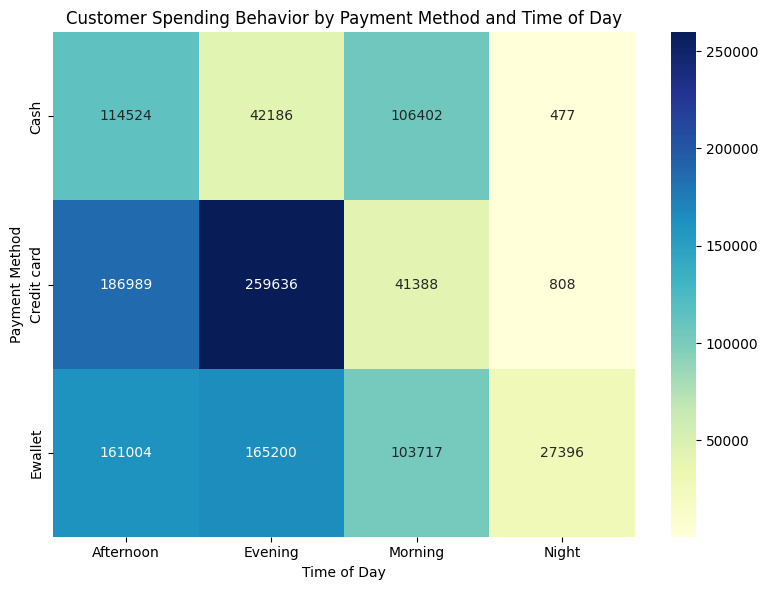

In [35]:
# Grouping sales by payment method and time of day
behavior_segmentation = df.groupby(['payment_method', 'Time_of_Day'])['Total_amount'].sum().reset_index()

# Pivot table for heatmap-style visualization
pivot = behavior_segmentation.pivot(index='payment_method', columns='Time_of_Day', values='Total_amount')

# Plot
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Customer Spending Behavior by Payment Method and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()


From the heatmap, we observe a clear trend in customer payment preferences. Credit Cards dominate evening transactions, indicating larger or planned purchases after work hours. Cash is more prevalent in the morning, likely used for quick or routine purchases. Interestingly, E-wallets maintain a steady presence throughout the day, reflecting a shift toward digital convenience. Night-time sales are almost non-existent across all methods

In [36]:
# Saving the cleaned data as CSV
df.to_csv("Walmart_Cleaned.csv", index=False)


In [ ]:
from google.colab import files
files.download("Walmart_Cleaned.csv")
